In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

加载数据集

In [11]:
train_df = pd.read_csv("../dataset/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("../dataset/sign_mnist_test/sign_mnist_test.csv")

数据集预览

In [12]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [13]:
# 设置绘图后端为 inline，确保图片在 Notebook 中显示
%matplotlib inline

数据集分布

<Axes: ylabel='count'>

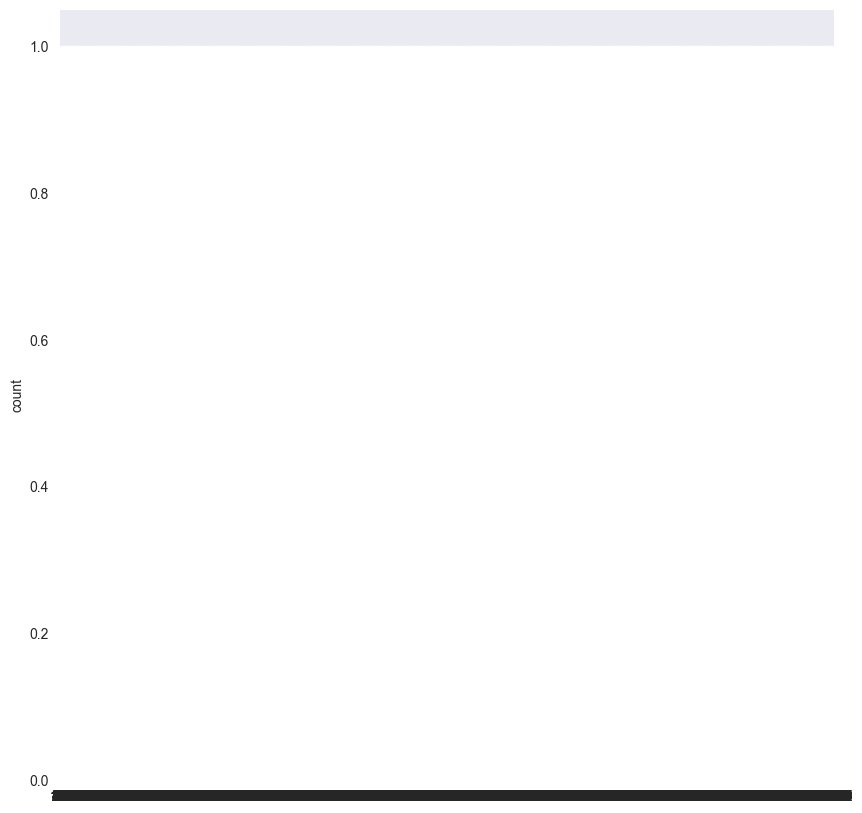

In [14]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

提取出训练集和测试集的标签和数据

In [15]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [17]:
x_train = train_df.values
x_test = test_df.values

In [18]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# from ultralytics import YOLO
# 
# # Load a COCO-pretrained YOLOv5n model
# model = YOLO("yolov5n.pt")
# 
# # Display model information (optional)
# model.info()
# 
# # Train the model on the COCO8 example dataset for 100 epochs
# results = model.train(data="coco8.yaml", epochs=100, imgsz=640)
# 
# # Run inference with the YOLOv5n model on the 'bus.jpg' image
# results = model("path/to/bus.jpg")

In [20]:
import os
import matplotlib.pyplot as plt

# 创建images文件夹（如果不存在）
os.makedirs('images', exist_ok=True)

# 保存前10张图片
for k in range(x_train.shape[0]):
    # 获取并reshape图片数据
    image = x_train[k].reshape(28, 28)
    # 保存为灰度图，文件名格式：image_0.png, image_1.png, ...
    plt.imsave(os.path.join('images', f'image_{k}.png'), image, cmap='gray')

In [2]:
import torch

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [3]:
import torch
torch.cuda.is_available()

True

In [1]:
import torchvision
import torch
print(torch.cuda.is_available())  # 应输出True
print(torch.__version__)  # 例如1.12.1+cu113
print(torchvision.__version__)  # 例如0.13.1+cu113

True
2.7.0+cu126
0.22.0+cu126
